In [9]:
%pip install requests

     -------------------------------------- 62.6/62.6 kB 480.1 kB/s eta 0:00:00
     ---------------------------------------- 96.7/96.7 kB 1.8 MB/s eta 0:00:00
     -------------------------------------- 61.5/61.5 kB 470.6 kB/s eta 0:00:00
     -------------------------------------- 123.6/123.6 kB 1.5 MB/s eta 0:00:00
     ------------------------------------ 157.0/157.0 kB 447.3 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from utils import *

from protocol_getter import ProtocolGetter

In [2]:
knesset_members_df = pd.read_csv('kns_csv_files\kns_person.csv')
first_names, last_names = knesset_members_df['FirstName'].to_list(), knesset_members_df['LastName'].to_list()
knesset_members = [' '.join([first_name, last_name]) for first_name, last_name in zip(first_names, last_names)]

In [3]:
import pandas as pd

cms = pd.read_csv("kns_csv_files\kns_committeesession.csv")

filtered = cms
filtered = filtered[filtered.CommitteeID == 929]
filtered = filtered[["CommitteeSessionID", "text_parsed_filename"]].dropna()["CommitteeSessionID"].tolist()
filtered

[571273,
 571851,
 572675,
 575804,
 576198,
 576237,
 576300,
 577328,
 577644,
 577650,
 577831,
 578064,
 578212,
 578586,
 578587,
 578695,
 578753,
 2005883,
 2005886,
 2006308,
 2006840,
 2007685,
 2008621,
 2009585,
 2010077,
 2010807,
 2010822,
 2012271,
 2013583,
 2013669,
 2015053,
 2015864,
 2015869,
 2016504,
 2016522,
 2016615,
 2016616,
 2016827,
 2017010,
 2017389,
 2017439,
 2017884,
 2018484,
 2018516,
 2018785,
 2018904,
 2018996,
 2019321,
 2019474,
 2019491,
 2019802,
 2020086,
 2020707,
 2021174,
 2022373,
 2022423,
 2022435,
 2022556,
 2022636,
 2022857,
 2022862,
 2023264,
 2023480,
 2023677,
 2024054,
 2024545,
 2024866,
 2025036,
 2025570,
 2025592,
 2063363,
 2063424,
 2064207,
 2064556,
 2064560,
 2064983,
 2065255,
 2065644,
 2065844,
 2065940,
 2065949,
 2066035,
 2066227,
 2066239,
 2067948,
 2068029,
 2068148,
 2068226,
 2068266,
 2068861,
 2069218,
 2069771,
 2069813,
 2070373,
 2070421,
 2070689,
 2070910,
 2071418,
 2071464,
 2071811,
 2071816,
 207215

In [6]:
path = "results/"
knss = [20, 21, 22, 23, 24, 25]
categorys = [1, 2, 4, 6, 13]
agg_scores = []
warned = []
kns_cat = []
knastot = {}
catagor = {}
cms = pd.read_csv("kns_csv_files\kns_committeesession.csv")

for kns in knss:
    for cat in categorys:
        protocol_getter = ProtocolGetter(COMMITTEES_PATH, kns, kns, [cat])
        committee = protocol_getter.committee_ids[0]
        filtered = cms
        filtered = filtered[filtered.CommitteeID == committee]
        sesseions = filtered[["CommitteeSessionID", "text_parsed_filename"]].dropna()["CommitteeSessionID"].tolist()
        agg_scores_per_sess = []
        for session in sesseions:
            try:
                with open(f'{path}finetune_{session}.pkl', 'rb') as f:
                    tmp_dct = pickle.load(f)
            except FileNotFoundError:
                continue

            warnings = tmp_dct['warnings']
            for member, w1w2w3 in warnings.items():
                for i in range(len(w1w2w3)):
                    w1w2w3[i] = int(round(w1w2w3[i]/2, 0))
                if sum(w1w2w3) != 0 and member in knesset_members:
                    warned.append((member, w1w2w3, kns, CATEGORY_ID_TO_NAME[cat], session))
            agg_score = tmp_dct['agg_score']
            agg_scores_per_sess.append(agg_score)
        avg_agg_score = np.mean(agg_scores_per_sess)
        agg_scores.append(avg_agg_score)
        kns_cat.append(f'{kns}_{CATEGORY_ID_TO_NAME[cat]}')
        tmp_val = knastot.get(kns, [])
        tmp_val.append(avg_agg_score)
        knastot[kns] = tmp_val
        catagor[CATEGORY_ID_TO_NAME[cat]] = tmp_val

avg_knasot = {}
for kns, agg_lst in knastot.items():
    avg_knasot[str(kns)] = np.average(agg_lst)
avg_cat = {}
for cat, agg_lst in catagor.items():
    avg_cat[cat] = np.average(agg_lst)

c:\Users\merav\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\merav\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Users\merav\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\merav\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Users\merav\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\merav\AppData\Loca

In [7]:
warned

[('שולי מועלם-רפאלי', [1, 0, 0], 20, 'knesset', 2075644),
 ('דוד ביטן', [1, 0, 0], 20, 'knesset', 2075644),
 ('עודד פורר', [1, 0, 0], 20, 'knesset', 2075644),
 ('רוברט אילטוב', [0, 1, 0], 20, 'knesset', 2077581),
 ('פנינה תמנו', [1, 0, 0], 20, 'knesset', 2077650),
 ('אחמד טיבי', [0, 1, 0], 20, 'knesset', 2078104),
 ('יואל חסון', [1, 0, 0], 20, 'knesset', 2078104),
 ('איילת נחמיאס ורבין', [1, 0, 0], 20, 'knesset', 2078104),
 ('אחמד טיבי', [1, 0, 0], 20, 'knesset', 2078121),
 ('יואל חסון', [1, 1, 0], 20, 'knesset', 2078121),
 ('פנינה תמנו', [2, 2, 1], 20, 'knesset', 2078158),
 ('אורן אסף חזן', [0, 0, 1], 20, 'knesset', 2078158),
 ('אמיר אוחנה', [1, 1, 0], 20, 'knesset', 2078219),
 ('אחמד טיבי', [1, 0, 0], 20, 'knesset', 2078255),
 ('סתיו שפיר', [0, 0, 2], 20, 'finance', 2075197),
 ('מיקי לוי', [1, 0, 0], 20, 'finance', 2075481),
 ('רועי פולקמן', [2, 0, 0], 20, 'finance', 2076204),
 ('יואל חסון', [1, 0, 0], 20, 'finance', 2077562),
 ("עיסאווי פריג'", [1, 0, 0], 20, 'finance', 2077562),
 (

In [8]:
ind = 0
knasots = {}
for k_c in kns_cat:
    a = k_c[:2]
    tmp = knasots.get(a, [[], []])
    tmp[0].append(k_c)
    tmp[1].append(agg_scores[ind])
    knasots[a] = tmp
    ind += 1


In [9]:
avg_cat

{'knesset': 0.24930820124669473,
 'finance': 0.24930820124669473,
 'defense': 0.24930820124669473,
 'law and order': 0.24930820124669473,
 'science': 0.24930820124669473}

In [10]:
knasots

{'20': [['20_knesset',
   '20_finance',
   '20_defense',
   '20_law and order',
   '20_science'],
  [0.15912342216961808,
   0.21102019580583847,
   0.25995444256257894,
   0.2654081363399679,
   0.3022683143867017]],
 '21': [['21_knesset',
   '21_finance',
   '21_defense',
   '21_law and order',
   '21_science'],
  [nan, 0.2619748969132838, 0.2496423007320386, nan, nan]],
 '22': [['22_knesset',
   '22_finance',
   '22_defense',
   '22_law and order',
   '22_science'],
  [0.20259923954450995, 0.24414653062078273, 0.16863808767633837, nan, nan]],
 '23': [['23_knesset',
   '23_finance',
   '23_defense',
   '23_law and order',
   '23_science'],
  [0.18612625061130586,
   0.23968979993713016,
   0.23670878762208913,
   0.22265923555262074,
   0.27237521340426335]],
 '24': [['24_knesset',
   '24_finance',
   '24_defense',
   '24_law and order',
   '24_science'],
  [0.18675600363799635,
   0.2515289776306446,
   0.26015820905594667,
   0.21543025707159874,
   nan]],
 '25': [['25_knesset',
  

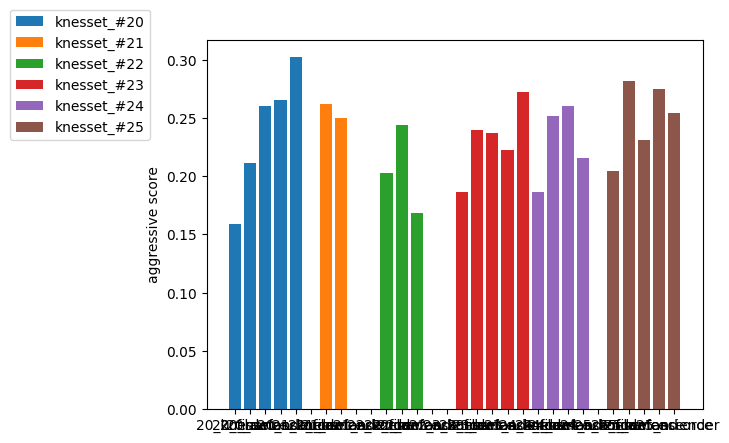

In [11]:
for kns, duo in knasots.items():
    plt.bar(duo[0], duo[1], label= f'knesset_#{kns}')
plt.ylabel("aggressive score")
plt.legend(bbox_to_anchor=(-0.1, 1.1))
plt.show()

Text(0, 0.5, 'aggressive score')

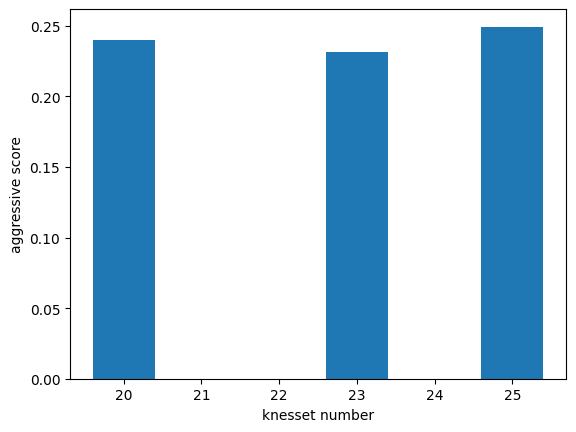

In [12]:
plt.bar(avg_knasot.keys(), avg_knasot.values())
plt.xlabel("knesset number")
plt.ylabel("aggressive score")

Text(0, 0.5, 'aggressive score')

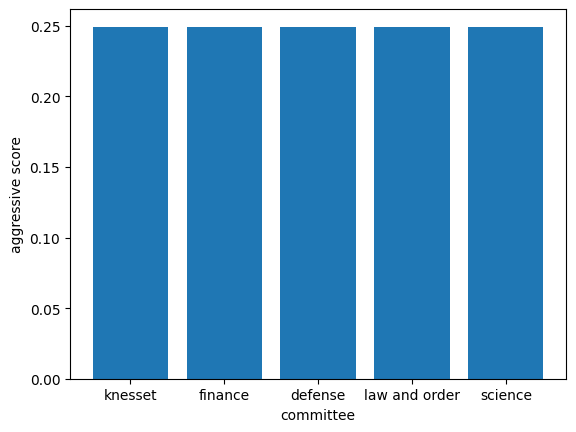

In [13]:
plt.bar(avg_cat.keys(), avg_cat.values())
plt.xlabel("committee")
plt.ylabel("aggressive score")

In [14]:
warned

[('שולי מועלם-רפאלי', [1, 0, 0], 20, 'knesset', 2075644),
 ('דוד ביטן', [1, 0, 0], 20, 'knesset', 2075644),
 ('עודד פורר', [1, 0, 0], 20, 'knesset', 2075644),
 ('רוברט אילטוב', [0, 1, 0], 20, 'knesset', 2077581),
 ('פנינה תמנו', [1, 0, 0], 20, 'knesset', 2077650),
 ('אחמד טיבי', [0, 1, 0], 20, 'knesset', 2078104),
 ('יואל חסון', [1, 0, 0], 20, 'knesset', 2078104),
 ('איילת נחמיאס ורבין', [1, 0, 0], 20, 'knesset', 2078104),
 ('אחמד טיבי', [1, 0, 0], 20, 'knesset', 2078121),
 ('יואל חסון', [1, 1, 0], 20, 'knesset', 2078121),
 ('פנינה תמנו', [2, 2, 1], 20, 'knesset', 2078158),
 ('אורן אסף חזן', [0, 0, 1], 20, 'knesset', 2078158),
 ('אמיר אוחנה', [1, 1, 0], 20, 'knesset', 2078219),
 ('אחמד טיבי', [1, 0, 0], 20, 'knesset', 2078255),
 ('סתיו שפיר', [0, 0, 2], 20, 'finance', 2075197),
 ('מיקי לוי', [1, 0, 0], 20, 'finance', 2075481),
 ('רועי פולקמן', [2, 0, 0], 20, 'finance', 2076204),
 ('יואל חסון', [1, 0, 0], 20, 'finance', 2077562),
 ("עיסאווי פריג'", [1, 0, 0], 20, 'finance', 2077562),
 (

In [15]:
for member, w1w2w3, kns, cat in warned:
    plt.bar(f'{member[::-1]} \n kns_number: {kns} \n comittee: {cat} \n warned: {w1w2w3}', sum(w1w2w3))
plt.ylabel("sum of warnings")

ValueError: too many values to unpack (expected 4)